In [1]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code')
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code/TimeSeriesAnalysis')
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code/TimeSeriesAnalysis/')

In [103]:
import pandas as pd
import TimeSeriesAnalysis.tsa_lth.analysis as analysis
import TimeSeriesAnalysis.tsa_lth.modelling as modelling
import TimeSeriesAnalysis.tsa_lth.tests as tests
from TimeSeriesAnalysis.tsa_lth.tools import *
import numpy as np
import matplotlib.pyplot as plt
import random

# 2.1 Working with time series

In [3]:
A1 = [1, -1.79, 0.84 ] 
C1 = [1, -0.18, -0.11 ]

A2 = [ 1, -1.79 ]
C2 = [ 1, -0.18, -0.11 ]

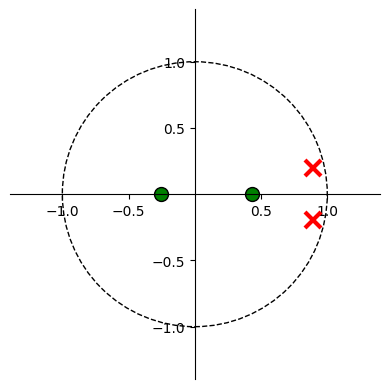

In [4]:
analysis.pzmap(C1,A1)

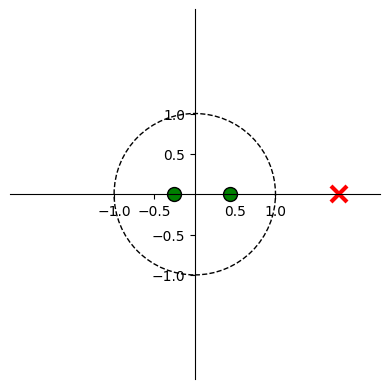

In [5]:
analysis.pzmap(C2,A2)

## Question 1

In [6]:
random.seed(10)

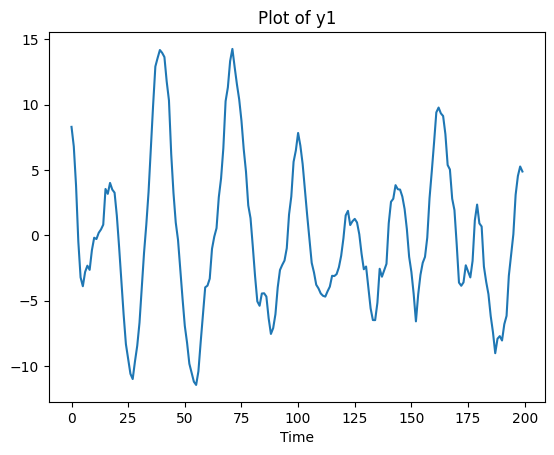

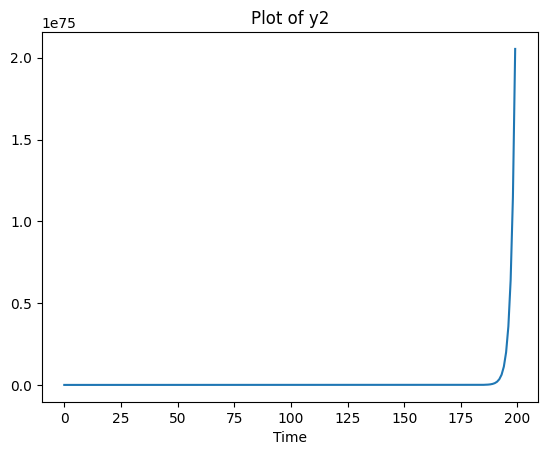

In [7]:
sigma = 1
N = 300
e1 = np.sqrt(sigma) * np.random.randn(N)
y1 = modelling.filter(C1,A1,e1)
y1 = y1[100:]

e2 = np.sqrt(sigma) * np.random.randn(N)
y2 = modelling.filter(C2,A2,e2)
y2 = y2[100:]
plt.plot(y1)
plt.title("Plot of y1")
plt.xlabel("Time")
plt.show()
plt.plot(y2)
plt.title("Plot of y2")
plt.xlabel("Time")
plt.show()

In [8]:
print(f'Zeros of y1: {np.roots(C1)}')
print(f'Poles of y1: {np.roots(A1)}')
print(f'Zeros of y2: {np.roots(C2)}')
print(f'Poles of y2: {np.roots(A2)}')

Zeros of y1: [ 0.43365681 -0.25365681]
Poles of y1: [0.895+0.19742087j 0.895-0.19742087j]
Zeros of y2: [ 0.43365681 -0.25365681]
Poles of y2: [1.79]


We see that absolute value of the Poles of y2 is greater than 1. Hence, the process of y2 is unstable and goes to +infinity or -infinity.

## Question 2

Done in Matlab, 

In [9]:
test1, test2 = analysis.covMvect(y1)

In [10]:
test1[0]

array([34.01475084])

## Question 3

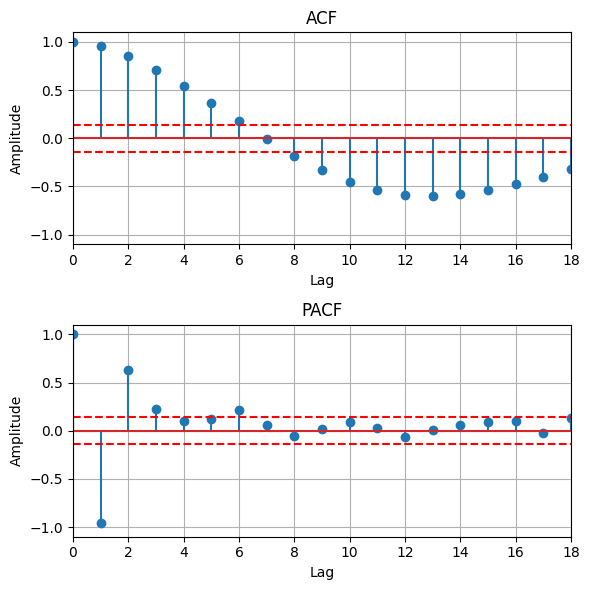

In [11]:
analysis.plotACFnPACF(y1)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.6837(±0.0465)·z⁻¹ + 0.7524(±0.0463)·z⁻²

Polynomial orders: nA = 2
Number of free coefficients: 2
Fit to estimation data (NRMSE): 81.82%
FPE : 1.141  MSE : 1.119
AIC : 588.12   BIC : 594.697



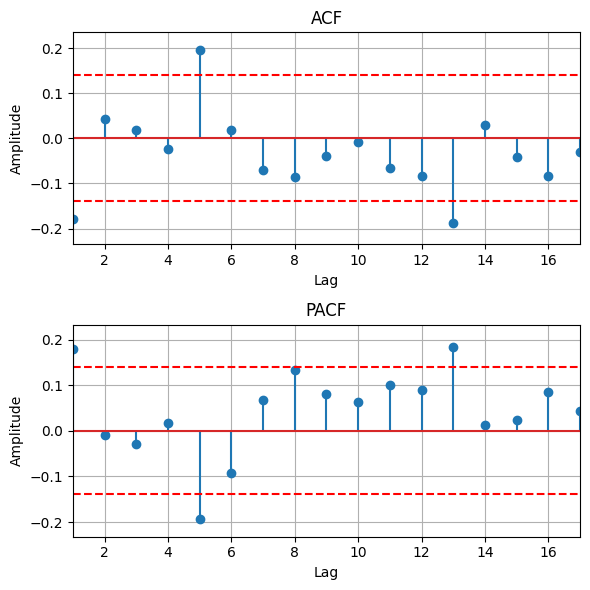

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 33.90 < 31.41)
  McLeod-Li test:        True (white if 12.87 < 31.41)
  Monti test:            False (white if 38.30 < 31.41)
  Sign change test:      True (white if 0.53 in [0.43,0.57])


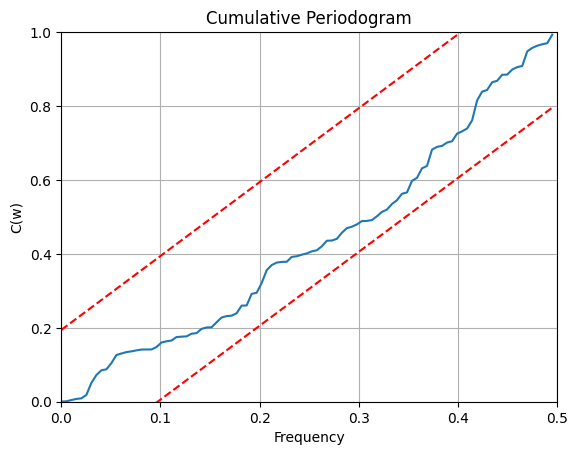

In [12]:
# Here it looks like there is a significant correlation in lag 1 and 2. Hence, we estimate AR(2)
A1 = [1, 1,1]
model_result = modelling.estimateARMA(y1, A=A1)

Here we see that our simulated data can be reasonably predicted using an AR(2) model.

In [13]:
model_result.FPE

1.1414339938413156

## Question 4

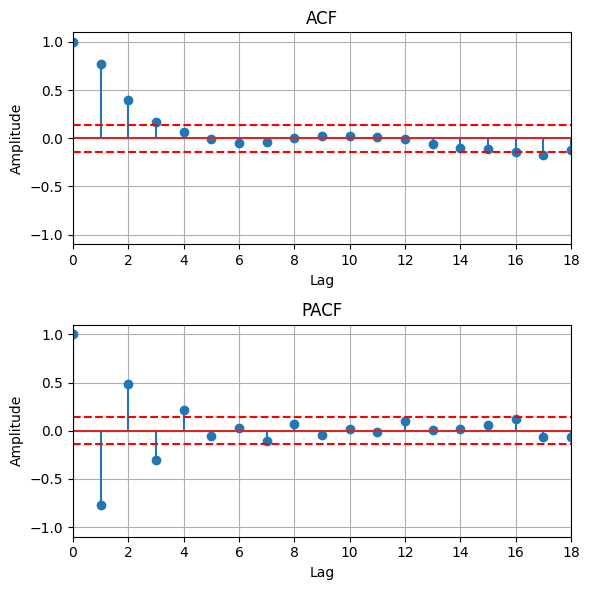

In [14]:
data = pd.read_csv('./data/data.dat', header=None,names=['y'])['y'].values.tolist()
analysis.plotACFnPACF(data)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 0.7723(±0.0451)·z⁻¹

Polynomial orders: nA = 1
Number of free coefficients: 1
Fit to estimation data (NRMSE): 36.13%
FPE : 1.772  MSE : 1.755
AIC : 678.674   BIC : 681.968



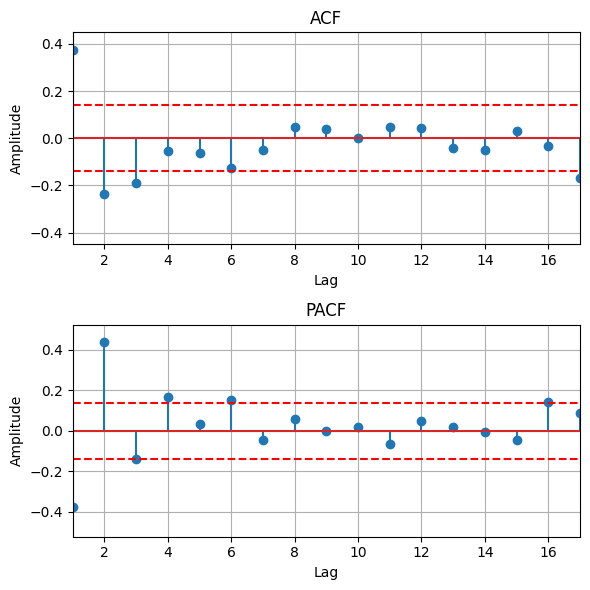

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 66.71 < 31.41)
  McLeod-Li test:        True (white if 23.52 < 31.41)
  Monti test:            False (white if 91.54 < 31.41)
  Sign change test:      False (white if 0.36 in [0.43,0.57])


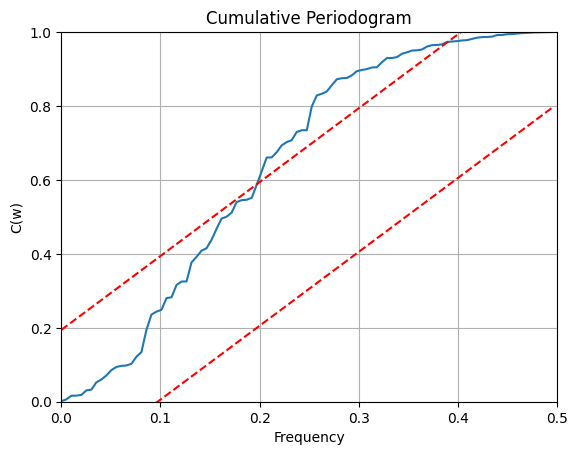

In [27]:
# For AR(1)
A=1
model_result_ar1 =modelling.estimateARMA(data, A=A)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.1466(±0.0621)·z⁻¹ + 0.4861(±0.0621)·z⁻²

Polynomial orders: nA = 2
Number of free coefficients: 2
Fit to estimation data (NRMSE): 44.03%
FPE : 1.373  MSE : 1.347
AIC : 624.947   BIC : 631.524



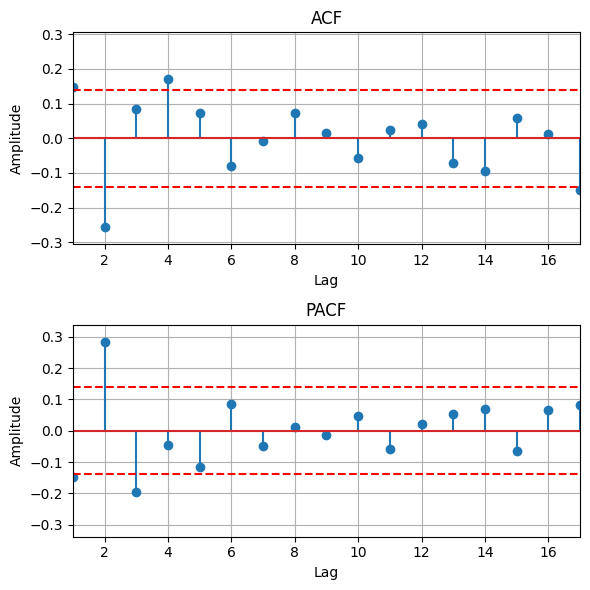

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 42.84 < 31.41)
  McLeod-Li test:        True (white if 24.44 < 31.41)
  Monti test:            False (white if 41.39 < 31.41)
  Sign change test:      True (white if 0.45 in [0.43,0.57])


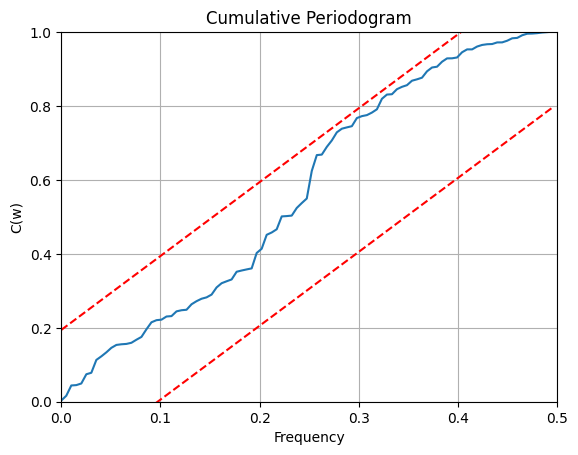

In [28]:
# For AR(2)
A=2
model_result_ar2 = modelling.estimateARMA(data, A=A)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.2952(±0.0678)·z⁻¹ + 0.8365(±0.098)·z⁻² - 0.306(±0.0681)·z⁻³

Polynomial orders: nA = 3
Number of free coefficients: 3
Fit to estimation data (NRMSE): 46.62%
FPE : 1.262  MSE : 1.226
AIC : 605.172   BIC : 615.022



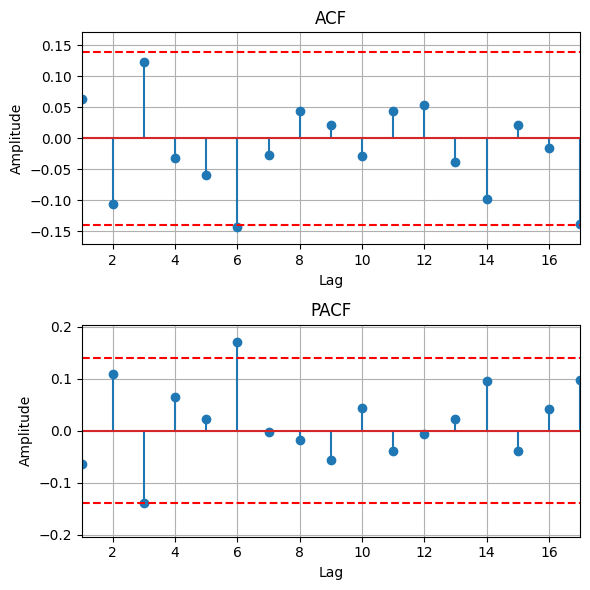

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 21.90 < 31.41)
  McLeod-Li test:        True (white if 17.40 < 31.41)
  Monti test:            True (white if 22.66 < 31.41)
  Sign change test:      True (white if 0.46 in [0.43,0.57])


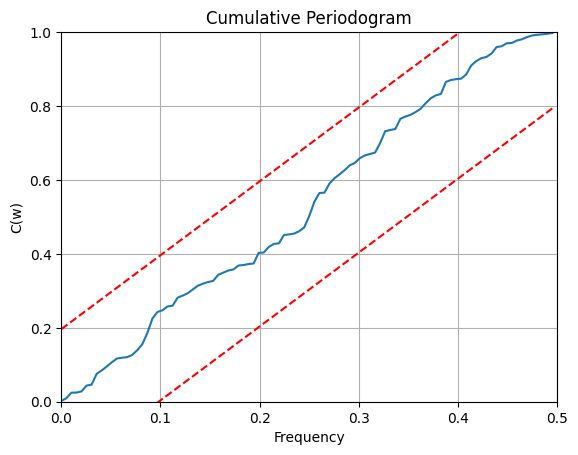

In [29]:
# For AR(3)
A=3
model_result_ar3 = modelling.estimateARMA(data, A=A)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.3593(±0.0695)·z⁻¹ + 1.015(±0.1117)·z⁻² - 0.5902(±0.1118)·z⁻³ + 0.221(±0.0698)·z⁻⁴

Polynomial orders: nA = 4
Number of free coefficients: 4
Fit to estimation data (NRMSE): 47.91%
FPE : 1.213  MSE : 1.167
AIC : 594.522   BIC : 607.635



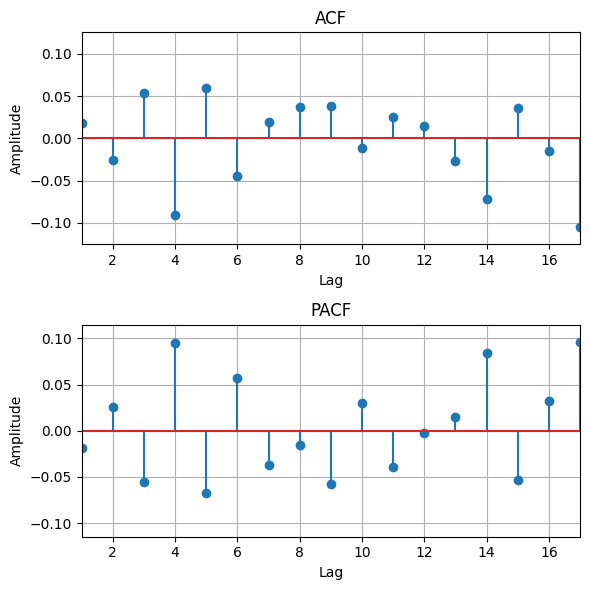

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 10.33 < 31.41)
  McLeod-Li test:        True (white if 15.85 < 31.41)
  Monti test:            True (white if 13.22 < 31.41)
  Sign change test:      True (white if 0.47 in [0.43,0.57])


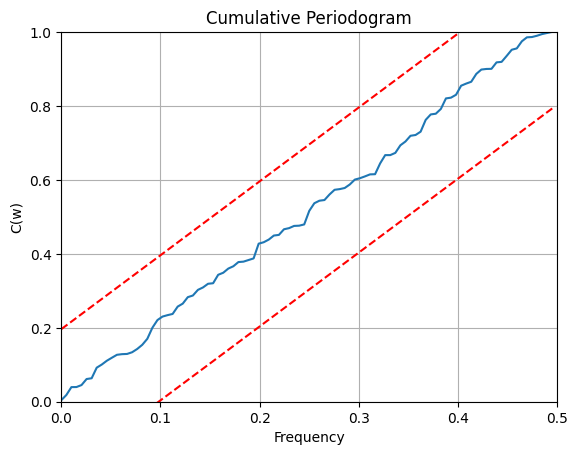

In [30]:
# For AR(4)
A=4
model_result_ar4 = modelling.estimateARMA(data, A=A)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.3793(±0.071)·z⁻¹ + 1.0545(±0.1189)·z⁻² - 0.6496(±0.1325)·z⁻³ + 0.3027(±0.1189)·z⁻⁴ - 0.0596(±0.0713)·z⁻⁵

Polynomial orders: nA = 5
Number of free coefficients: 5
Fit to estimation data (NRMSE): 48.18%
FPE : 1.215  MSE : 1.155
AIC : 591.534   BIC : 607.899



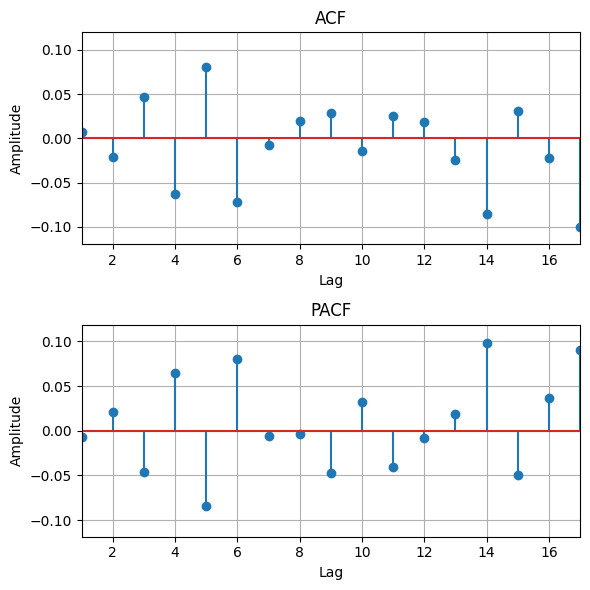

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 10.72 < 31.41)
  McLeod-Li test:        True (white if 17.12 < 31.41)
  Monti test:            True (white if 13.11 < 31.41)
  Sign change test:      True (white if 0.48 in [0.43,0.57])


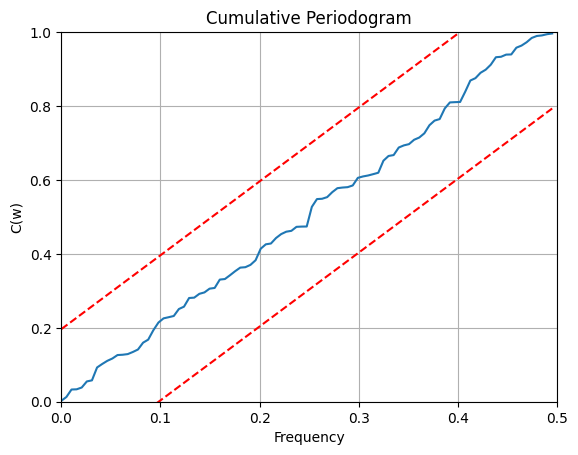

In [31]:
# For AR(5)
A=5
model_result_ar5 = modelling.estimateARMA(data, A=A)

Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 - 0.4667(±0.1121)·z⁻¹
C(z) = 1.0 + 0.9169(±0.123)·z⁻¹ + 0.1738(±0.1162)·z⁻²

Polynomial orders: nA = 1    nC = 2
Number of free coefficients: 3
Fit to estimation data (NRMSE): 48.35%
FPE : 1.182  MSE : 1.148
AIC : 598.128   BIC : 608.008



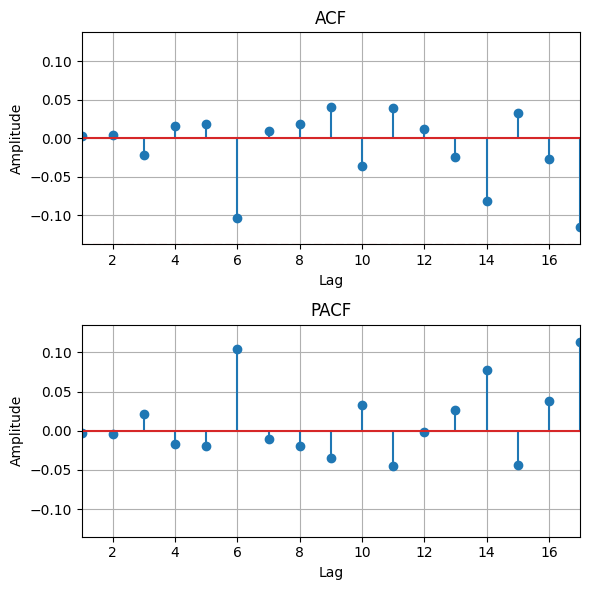

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 10.95 < 31.41)
  McLeod-Li test:        True (white if 22.07 < 31.41)
  Monti test:            True (white if 10.68 < 31.41)
  Sign change test:      True (white if 0.48 in [0.43,0.57])


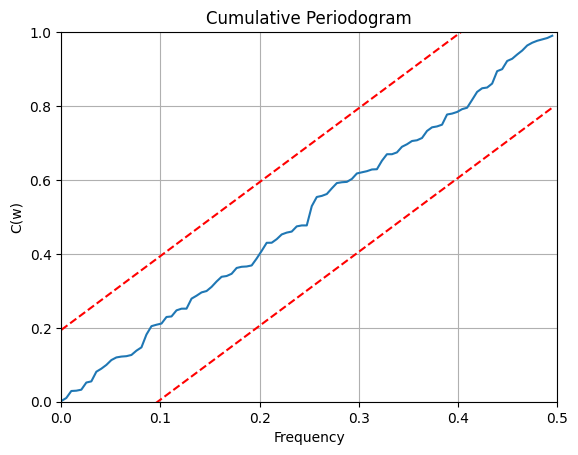

In [32]:
# For ARMA(1,2)
A=1
C= 2
model_result_ar1_ma2 = modelling.estimateARMA(data, A=A,C=C)

I would chose AR(3) as after checking the ACF and PACF of AR(2), I would have increased the order of the A-coefficient to 3 after still observing a bump in lag 3 in the PACF of AR(2). After observing the ACF and PACF of AR(3), it seems reasonably white for both, and it also passed the Monti-test and sign change test.

## Question 5

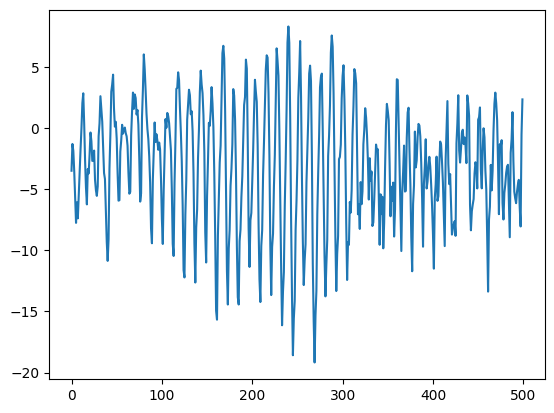

In [62]:
random.seed(0)
A = [1, -1.5, 0.7 ] ;
C = [1]+ [0]*11 + [-0.5];
A12 = [1] + [0]*11 +[-1];
A_star = np.convolve(A, A12 ) ;
e = np.random.randn(600) ;
y = modelling.filter(C,A_star,e, remove=100)
plt.plot(y)

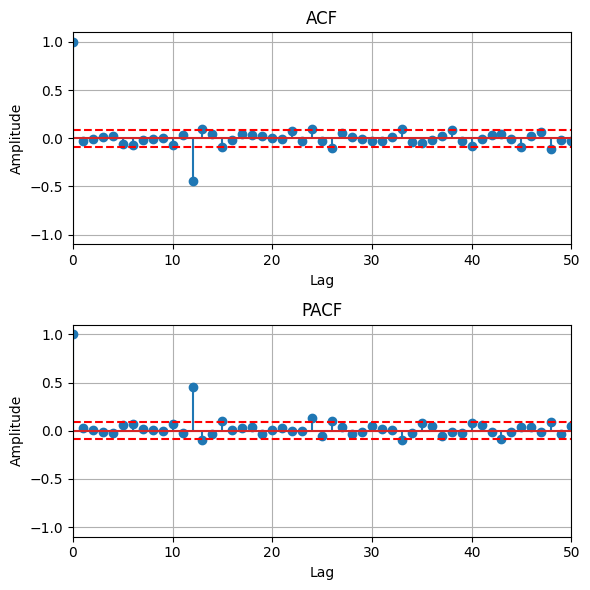

In [91]:
y_s = modelling.filter(A12,1,y, remove=len(A12)-1)
ordA=2
ordC=0
model = modelling.PEM(y_s, A=ordA, C=ordC)
# if not isinstance(A, int): A_free = np.array(ordA).astype(bool)
# if not isinstance(C, int): C_free = np.array(ordC).astype(bool)
model.set_free_params(A_free=[1, 1,1], C_free=[1])
model_fitted = model.fit(method='LS', bh=False)
res = model_fitted.resid
analysis.plotACFnPACF(res,noLags=50,titleStr=None)

Here we still observe a significant value in lag 12 in the ACF. Which shows that the ACF and PACF is not white. Hence we proceed by including the parameter c12

Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 - 1.4703(±0.0337)·z⁻¹ + 0.6707(±0.0337)·z⁻²
C(z) = 1.0 - 0.4876(±0.0385)·z⁻¹²

Polynomial orders: nA = 2    nC = 12
Number of free coefficients: 3
Fit to estimation data (NRMSE): 68.72%
FPE : 0.975  MSE : 0.963
AIC : 1366.85   BIC : 1379.408



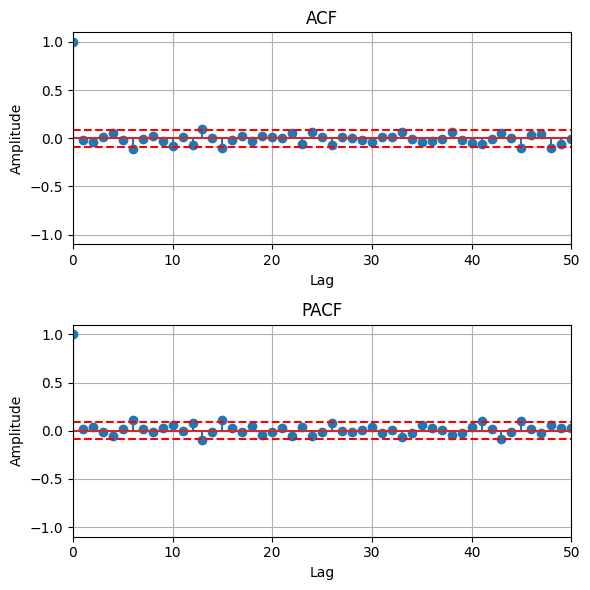

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 25.68 < 31.41)
  McLeod-Li test:        True (white if 20.10 < 31.41)
  Monti test:            True (white if 28.18 < 31.41)
  Sign change test:      True (white if 0.49 in [0.46,0.54])


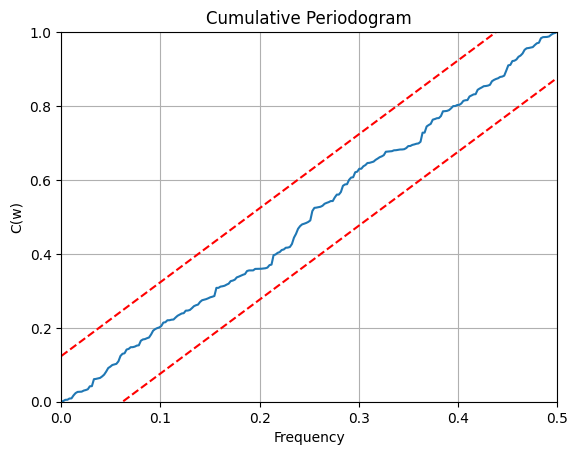

In [107]:
ordA=2
ordC=[1] + [0]*11 + [1]
model = modelling.PEM(y_s, A=ordA, C=ordC)

model.set_free_params(A_free=[1, 1,1], C_free=ordC)
model_fitted = model.fit(method='LS', bh=False)
res = model_fitted.resid
model_fitted.summary()
analysis.plotACFnPACF(res,noLags=50,titleStr=None)
tests.whiteness_test(res)

Here the ACF and PACF looks reasonably gaussian and our tests supports this argument. 